In [1]:
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential,Model,initializers,layers,Input
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
import PIL
import PIL.Image

import os

import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import tensorflow_datasets as tfds

In [3]:
print(tf.__version__)
print(tfds.__version__)

2.8.0
4.5.2


In [4]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'cs_restaurants',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adr

In [5]:
dataset= tfds.load('beans')

In [6]:
train_ds = dataset['train']
val_ds = dataset['validation']
test_ds = dataset['test']

print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

1034
133
128


Label: 1


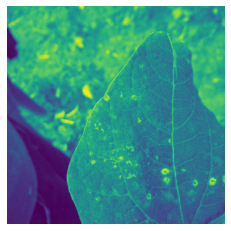

In [7]:
for data in train_ds.take(1):
    image, label = data['image'], data['label']
    plt.imshow(image.numpy()[:, :, 0].astype(np.float32))
    plt.axis('off')
    print("Label: %d" % label.numpy())

In [8]:
for data in train_ds:
    image, label = data['image'], data['label']
    print(image.shape)
    print(label.shape)
    break

print(np.min(image), np.max(image))
print(np.min(label), np.max(label))

(500, 500, 3)
()
0 255
1 1


In [9]:
batch_size = 32
img_height = 224
img_width = 224

In [10]:
def normalize(dataset):    
    image, label = tf.cast(dataset['image'], tf.float32) / 255.0, dataset['label']
    return image, label

In [11]:
def resize(dataset):    
    image = tf.cast(dataset['image'], tf.float32)
    img_resize = image.resize((224, 224))
    label = dataset['label']
    return image, label
# 리사이즈 동작안함

In [12]:
def preprocess(dataset):
    image = tf.cast(dataset['image'], tf.float32) / 255.0
    img_resize = tf.image.resize(image, [224, 224])
    label = dataset['label']
    return img_resize, label

In [13]:
train_dataset = train_ds.map(preprocess).batch(32)
val_dataset = val_ds.map(preprocess).batch(32)
test_dataset = test_ds.map(preprocess).batch(32)

In [14]:
image_batch, labels_batch = next(iter(train_dataset))
print(image_batch.shape)
print(labels_batch.shape)

(32, 224, 224, 3)
(32,)


In [15]:
VGG_16=Sequential([
        layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),strides=(1,1),padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(kernel_size=(3,3),filters=64,strides=(1,1),padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),

        layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
        layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),

        layers.Flatten(),
        layers.Dense(units=256,activation='relu'),
        layers.Dense(units=128,activation='relu'),
        layers.Dense(units=3,activation='softmax')
])

In [16]:
VGG_16.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
VGG_16.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
33/33 [==============================] - 22s 403ms/step - loss: 27.2592 - accuracy: 0.4052 - val_loss: 4.6469 - val_accuracy: 0.3835
Epoch 2/5
33/33 [==============================] - 10s 316ms/step - loss: 3.6049 - accuracy: 0.4884 - val_loss: 7.2909 - val_accuracy: 0.3233
Epoch 3/5
33/33 [==============================] - 10s 312ms/step - loss: 3.1200 - accuracy: 0.5300 - val_loss: 1.1398 - val_accuracy: 0.3609
Epoch 4/5
33/33 [==============================] - 10s 314ms/step - loss: 2.4845 - accuracy: 0.5667 - val_loss: 1.0988 - val_accuracy: 0.3383
Epoch 5/5
33/33 [==============================] - 10s 315ms/step - loss: 1.9314 - accuracy: 0.6151 - val_loss: 1.4984 - val_accuracy: 0.3383
